

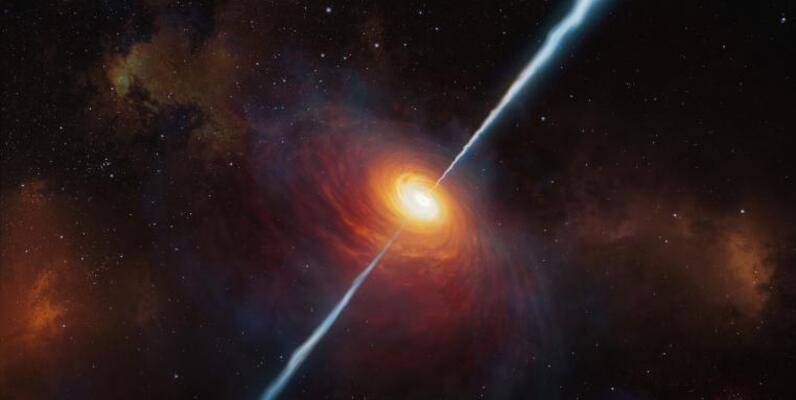

# Introduction to Dataset
In astronomy, stellar classification is the classification of
stars based on their spectral characteristics. The classification scheme of galaxies, quasars, and stars is one of the most fundamental in astronomy. The early cataloguing of stars and their distribution in the sky has led to the understanding that they make up our own galaxy and, following the distinction that Andromeda was a separate galaxy to our own, numerous galaxies began to be surveyed as more powerful telescopes were built. This datasat aims to classificate stars, galaxies, and quasars based on their spectral characteristics.

# Dataset Description :
The data consists of 100,000 observations of space taken by the SDSS (Sloan Digital Sky Survey). Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.

1.  obj_ID = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS
2.  alpha = Right Ascension angle (at J2000 epoch)
3.  delta = Declination angle (at J2000 epoch)
4.  u = Ultraviolet filter in the photometric system
5.  g = Green filter in the photometric system
6.  r = Red filter in the photometric system
7.  i = Near Infrared filter in the photometric system
8.  z = Infrared filter in the photometric system
9.  run_ID = Run Number used to identify the specific scan
10.  rereun_ID = Rerun Number to specify how the image was processed
11.  cam_col = Camera column to identify the scanline within the run
12.  field_ID = Field number to identify each field
13.  spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)
14.  class = object class (galaxy, star or quasar object)
15.  redshift = redshift value based on the increase in wavelength
16.  plate = plate ID, identifies each plate in SDSS
17.  MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken
18.  fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import roc_auc_score, precision_recall_curve

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import xgboost


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import roc_auc_score, precision_recall_curve



In [3]:
df=pd.read_csv('star_classification.csv')

In [22]:
df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [23]:
df.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64


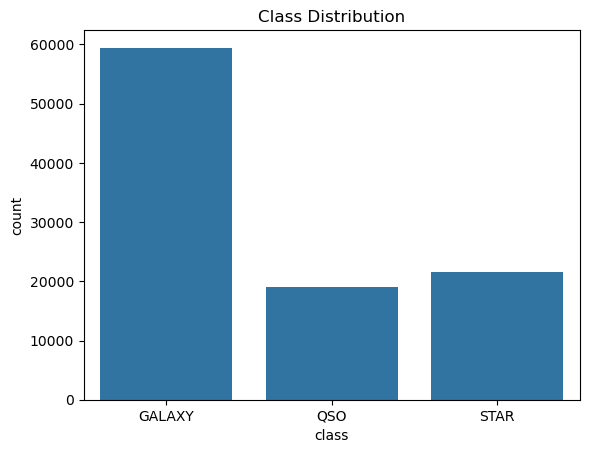

In [24]:
print(df['class'].value_counts())
sns.countplot(data=df, x='class')
plt.title("Class Distribution")
plt.show()

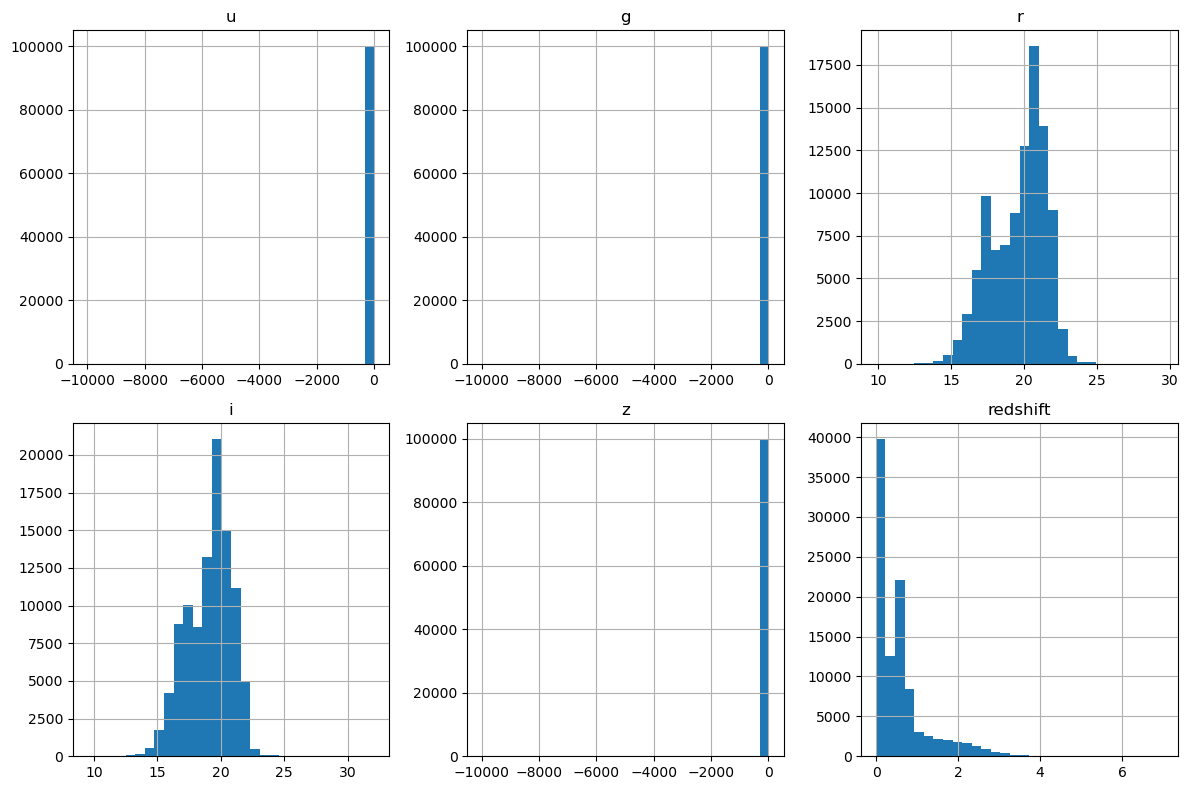

In [4]:
numeric_features = ['u', 'g', 'r', 'i', 'z', 'redshift']
df[numeric_features].hist(bins=30, figsize=(12, 8), layout=(2, 3))
plt.tight_layout()
plt.show()

### Detection of outliers using boxplots



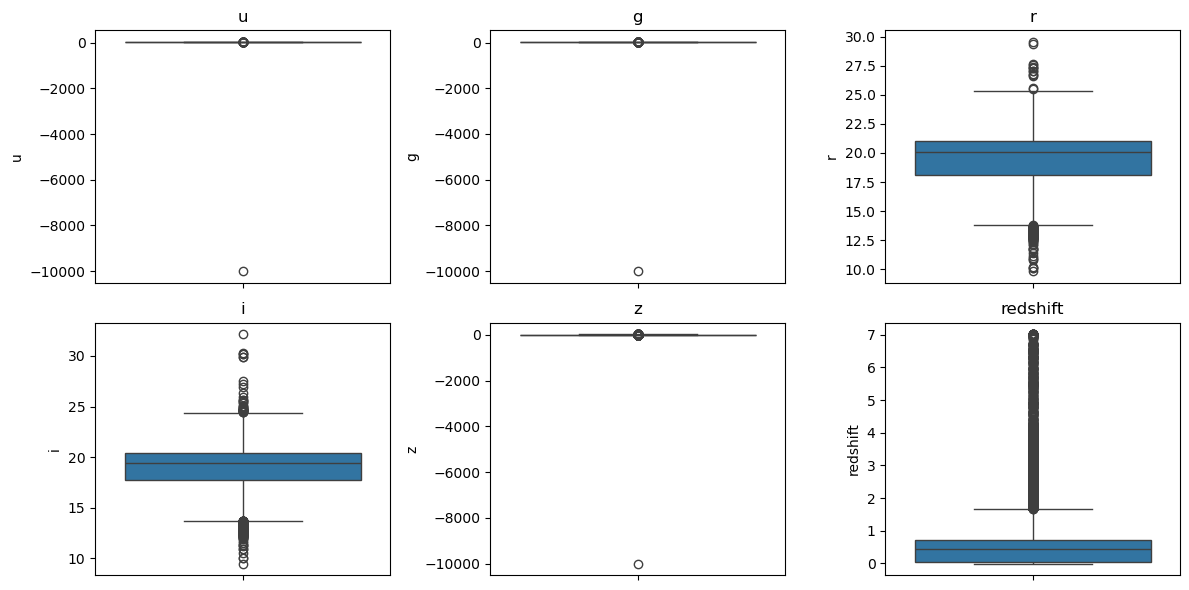

In [25]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

### Outlier Removal:
 Used Z-score normalization to remove outliers (values > 3 standard deviations).

In [5]:
z_scores = np.abs(zscore(df[numeric_features]))
df = df[(z_scores < 3).all(axis = 1)]

In [6]:
df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


### Feature Engineering:
Created color index features: ug, gr, ri, iz, which are useful in distinguishing object types based on their spectral characteristics.

In [7]:
df['ug'] = df['u'] - df['g']
df['gr'] = df['g'] - df['r']
df['ri'] = df['r'] - df['i']
df['iz'] = df['i'] - df['z']


In [8]:
df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,...,spec_obj_ID,class,redshift,plate,MJD,fiber_ID,ug,gr,ri,iz
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,...,6.543777e+18,GALAXY,0.634794,5812,56354,171,1.60352,1.88029,1.22928,0.37202
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,...,1.176014e+19,GALAXY,0.779136,10445,58158,427,1.94571,0.24744,1.41632,-0.44615
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,...,5.152200e+18,GALAXY,0.644195,4576,55592,299,2.59918,2.05413,1.26119,0.40030
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,...,1.030107e+19,GALAXY,0.932346,9149,58039,775,-1.63974,2.16494,1.10708,1.25444
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,...,6.891865e+18,GALAXY,0.116123,6121,56187,842,1.85690,1.08281,0.52036,0.43250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,...,1.055431e+19,GALAXY,0.000000,9374,57749,438,-0.80827,1.07182,0.59856,0.56979
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,...,8.586351e+18,GALAXY,0.404895,7626,56934,866,0.30490,1.93625,0.69244,0.34233
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,...,3.112008e+18,GALAXY,0.143366,2764,54535,74,1.89919,1.06569,0.51394,0.33813
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,...,7.601080e+18,GALAXY,0.455040,6751,56368,470,3.71282,1.72371,0.84132,0.44772


### Label Encoding:
 Converted categorical class labels into numeric values using LabelEncoder.

In [9]:
encoder_labels = LabelEncoder()
df['encoded_class'] = encoder_labels.fit_transform(df['class'])
n_classes = len(encoder_labels.classes_)
print(f"Number of classes: {n_classes}")
print(f"Classes: {encoder_labels.classes_}")


Number of classes: 3
Classes: ['GALAXY' 'QSO' 'STAR']


### Class Imbalance Handling:
Addressed the class imbalance using SMOTE to synthetically oversample the minority classes (Star, QSO).

In [10]:
numeric_features1= ['u', 'g', 'r', 'i', 'z', 'redshift', 'ug', 'gr', 'ri', 'iz']


X = df[numeric_features1]
y = df['encoded_class']
smote = SMOTE(random_state = 42)
X_new, y_new = smote.fit_resample(X, y)

In [11]:
X_new.shape,y_new.shape

((177750, 10), (177750,))

### Data Splitting:


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.33, random_state=42, stratify=y_new)
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (119092, 10)
Test set shape: (58658, 10)


### Feature Scaling:


In [41]:
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

### Dimensionality Reduction:
 Applied PCA (Principal Component Analysis) to retain 95% of the data's variance while reducing dimensionality, which also helps improve model performance.

In [42]:
pca = PCA(n_components = 0.95)
X_tr_pca = pca.fit_transform(X_train)
print(f"Original features for X_train: {X_train.shape[1]}, PCA features: {X_tr_pca.shape[1]} \n")
x_te_pca = pca.transform(X_test)
print(f"Original features for X_test : {X_test.shape[1]}, PCA features: {x_te_pca.shape[1]} \n")


Original features for X_train: 10, PCA features: 5 

Original features for X_test : 10, PCA features: 5 



### Function to evaluate and display metrics

In [43]:
def evaluate_model(model, x_tr_s, x_te_s, y_train, y_test, model_name):
    model.fit(x_tr_s, y_train)

    y_pred = model.predict(x_te_s)
    y_pred_prob = model.predict_proba(x_te_s)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"\n{model_name} Performance Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=encoder_labels.classes_))

    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=encoder_labels.classes_,
                yticklabels=encoder_labels.classes_)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(8, 6))
    n_classes = len(encoder_labels.classes_)

    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test == i, y_pred_prob[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2,
                 label=f'ROC curve (class {encoder_labels.classes_[i]}, area = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

    return model

### Random Forest¶
Random Forest is an ensemble learning method that builds multiple decision trees and combines their outputs for more accurate and stable predictions. It handles high-dimensional data well and is robust against overfitting. Here, we use a 100-tree Random Forest to capture nonlinear patterns in the astronomical data.




RANDOM FOREST

Random Forest Performance Metrics:
Accuracy: 0.9653
Precision: 0.9654
Recall: 0.9653
F1 Score: 0.9653

Classification Report:
              precision    recall  f1-score   support

      GALAXY       0.95      0.95      0.95     19552
         QSO       0.98      0.96      0.97     19553
        STAR       0.96      0.99      0.98     19553

    accuracy                           0.97     58658
   macro avg       0.97      0.97      0.97     58658
weighted avg       0.97      0.97      0.97     58658



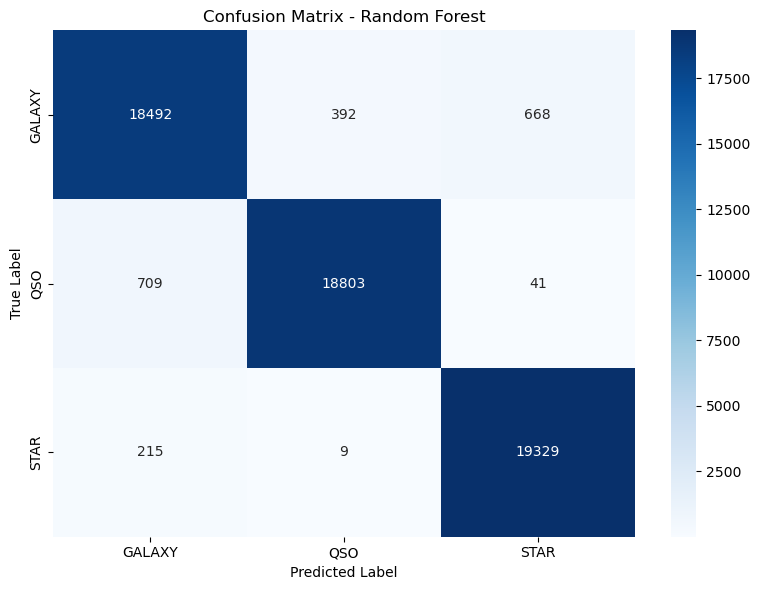

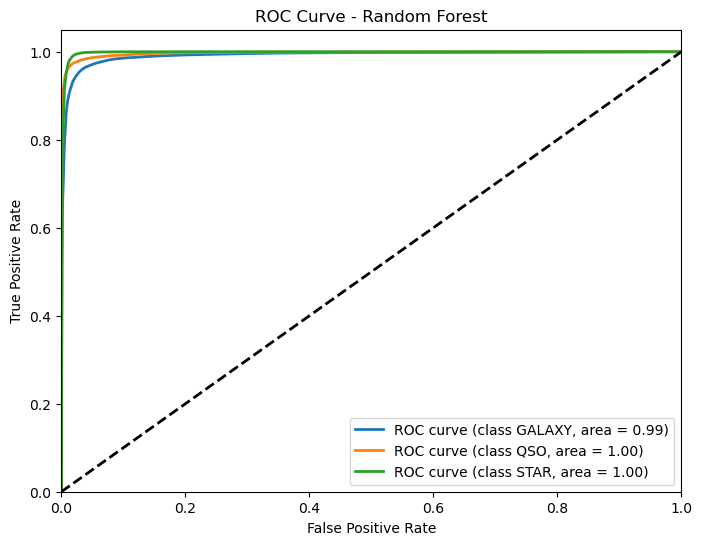

In [44]:
print("\n" + "="*50)
print("RANDOM FOREST")
print("="*50)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model = evaluate_model(rf_model, X_tr_pca, x_te_pca, y_train, y_test, "Random Forest")

### KNN¶
K-Nearest Neighbors is a non-parametric algorithm that classifies new data points based on the majority class of their nearest neighbors in feature space. It’s intuitive and effective for small to medium-sized datasets. We use GridSearchCV to tune hyperparameters like the number of neighbors and distance metrics to optimize performance.


K-Nearest Neighbors: Hyperparameter Tuning & Evaluation

[INFO] Starting KNN Model Tuning...
Optimal KNN Settings: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}

Tuned KNN Performance Metrics:
Accuracy: 0.9681
Precision: 0.9682
Recall: 0.9681
F1 Score: 0.9679

Classification Report:
              precision    recall  f1-score   support

      GALAXY       0.97      0.93      0.95     19552
         QSO       0.96      0.98      0.97     19553
        STAR       0.97      0.99      0.98     19553

    accuracy                           0.97     58658
   macro avg       0.97      0.97      0.97     58658
weighted avg       0.97      0.97      0.97     58658



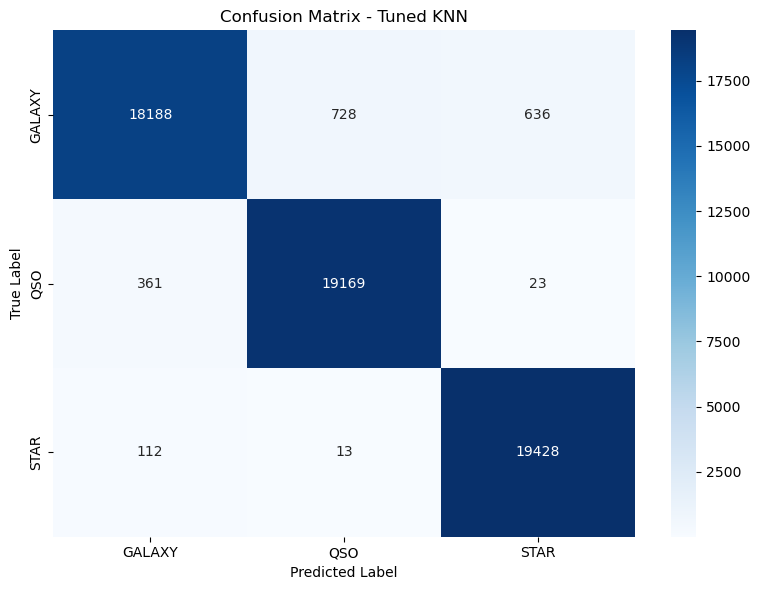

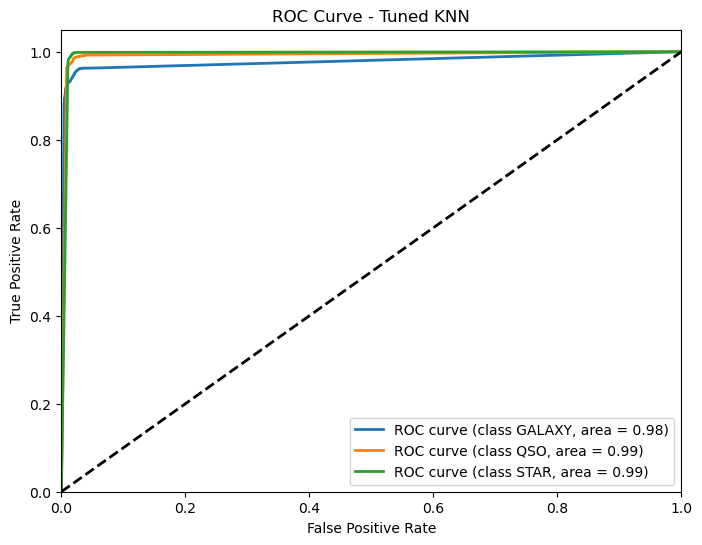

In [45]:
print("\n" + "="*50)
print("K-Nearest Neighbors: Hyperparameter Tuning & Evaluation")
print("="*50)

print("\n[INFO] Starting KNN Model Tuning...")

knn_params = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_model = KNeighborsClassifier()
knn_search = GridSearchCV(knn_model, knn_params, cv=5, scoring='accuracy', n_jobs=-1)
knn_search.fit(X_train, y_train)

optimal_knn = knn_search.best_estimator_
print("Optimal KNN Settings:", knn_search.best_params_)

knn_model = evaluate_model(optimal_knn, X_tr_pca, x_te_pca, y_train, y_test, "Tuned KNN")

### XGBoost¶
XGBoost is a highly optimized and regularized gradient boosting algorithm that often performs well in structured data problems. It builds decision trees sequentially and focuses on minimizing classification errors. We use GridSearchCV to tune XGBoost's hyperparameters and leverage its power to classify stars, galaxies, and quasars effectively.


XGBoost Classifier

[INFO] Tuning XGBoost Classifier...

XGBoost Performance Metrics:
Accuracy: 0.9628
Precision: 0.9629
Recall: 0.9628
F1 Score: 0.9628

Classification Report:
              precision    recall  f1-score   support

      GALAXY       0.94      0.95      0.95     19552
         QSO       0.97      0.95      0.96     19553
        STAR       0.97      0.99      0.98     19553

    accuracy                           0.96     58658
   macro avg       0.96      0.96      0.96     58658
weighted avg       0.96      0.96      0.96     58658



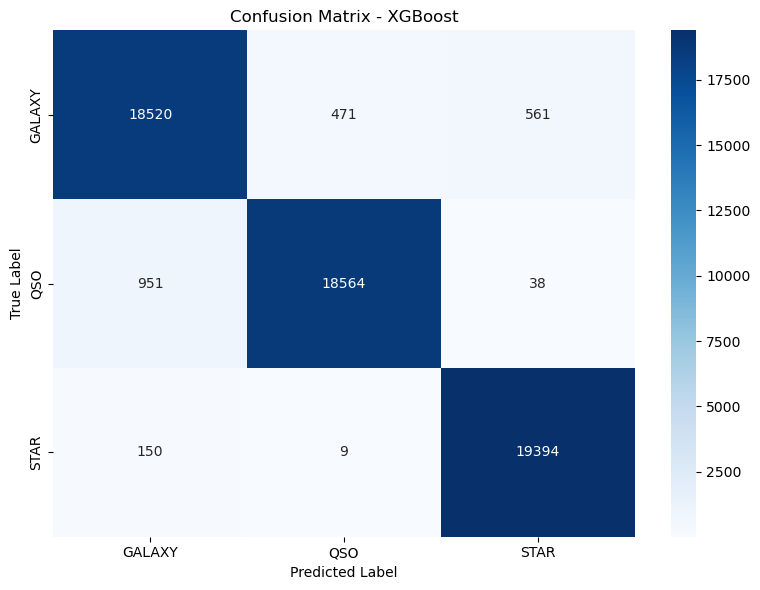

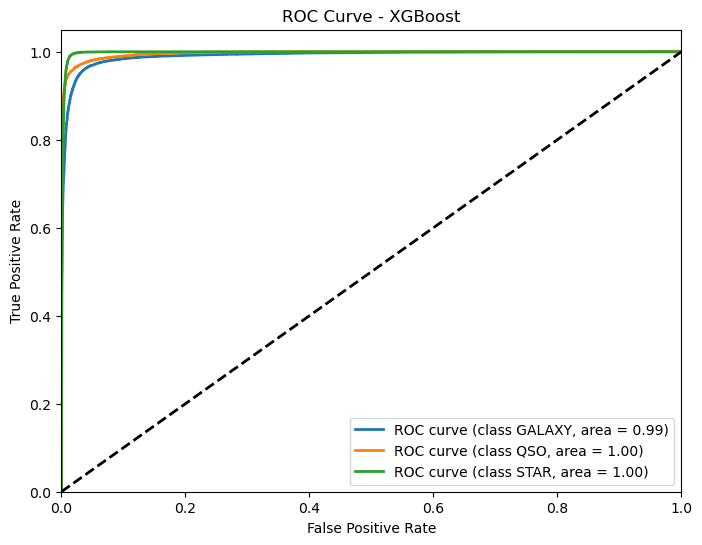

In [54]:

model = XGBClassifier(n_estimators=100,random_state=42)
model= evaluate_model(model, X_tr_pca, x_te_pca, y_train, y_test, "XGBoost")

### Logistic Regression¶
Logistic Regression is a simple yet effective linear classification algorithm often used as a baseline model. It works by modeling the probability of class membership using a logistic (sigmoid) function. In this notebook, we use it to establish a baseline performance for stellar classification based on the SDSS features.


LOGISTIC REGRESSION

Logistic Regression Performance Metrics:
Accuracy: 0.9431
Precision: 0.9430
Recall: 0.9431
F1 Score: 0.9429

Classification Report:
              precision    recall  f1-score   support

      GALAXY       0.91      0.92      0.92     19552
         QSO       0.95      0.92      0.93     19553
        STAR       0.97      0.99      0.98     19553

    accuracy                           0.94     58658
   macro avg       0.94      0.94      0.94     58658
weighted avg       0.94      0.94      0.94     58658



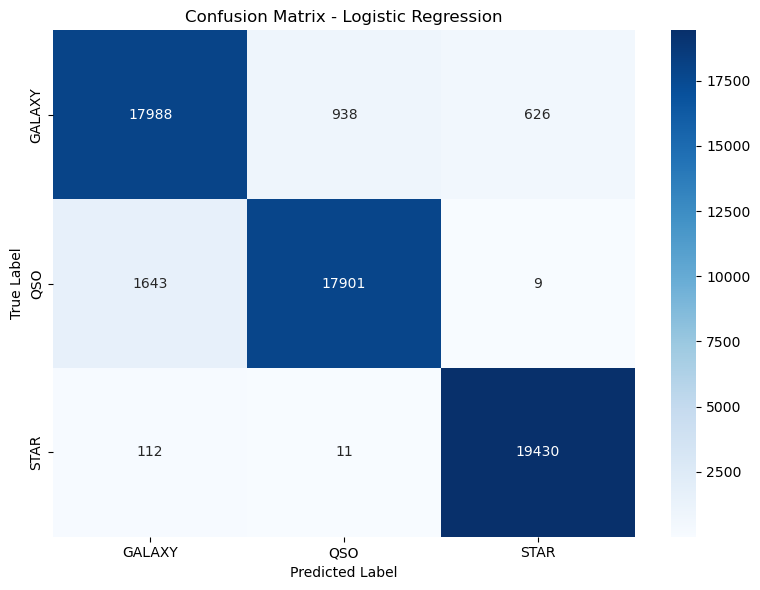

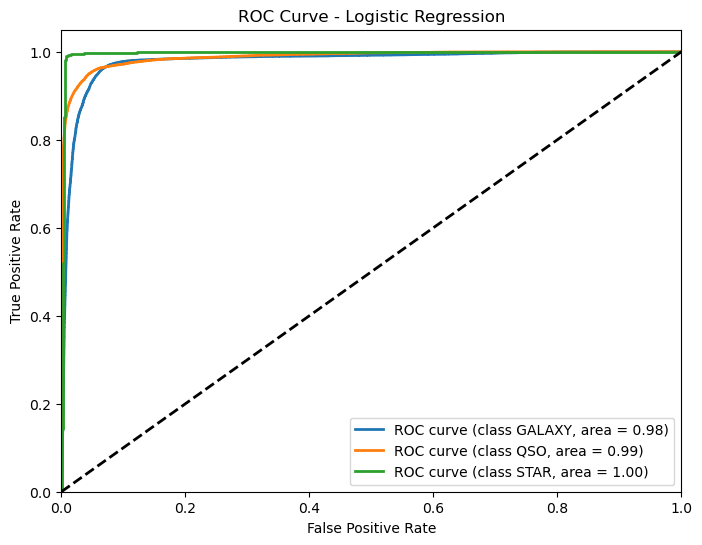

In [47]:
print("\n" + "="*50)
print("LOGISTIC REGRESSION")
print("="*50)
lr_model = LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1)
lr_model = evaluate_model(lr_model, X_tr_pca, x_te_pca, y_train, y_test, "Logistic Regression")

### Final Model Comparison & Selection¶


<Figure size 1400x600 with 0 Axes>

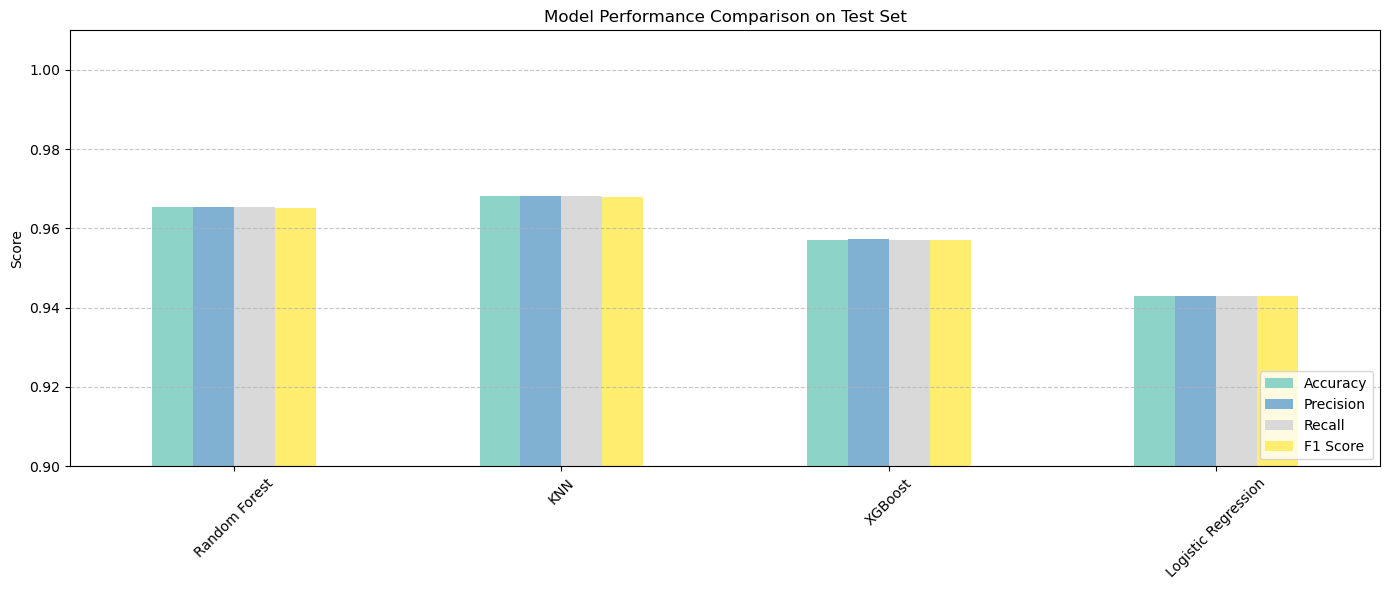


Model Performance Comparison (Test Set):


,Accuracy,Precision,Recall,F1 Score
Random Forest,0.965324,0.965382,0.965324,0.965274
KNN,0.968069,0.968209,0.968069,0.967881
XGBoost,0.957158,0.957372,0.957158,0.957104
Logistic Regression,0.943077,0.943039,0.943077,0.942892



Based on weighted average metrics (Accuracy, Precision, Recall, F1 Score):
The best performing model is: KNN with an average score of 0.9681


In [48]:
y_pred_lr = lr_model.predict(x_te_pca)
y_pred_rf = rf_model.predict(x_te_pca)
y_pred_knn = knn_model.predict(x_te_pca)
y_pred_xgb = xgb_model.predict(x_te_pca)

models = [ "Random Forest", "KNN", "XGBoost","Logistic Regression"]
predictions = [ y_pred_rf, y_pred_knn, y_pred_xgb,y_pred_lr]

metrics = {
    "Accuracy": [accuracy_score(y_test, pred) for pred in predictions],
    "Precision": [precision_score(y_test, pred, average='weighted') for pred in predictions],
    "Recall": [recall_score(y_test, pred, average='weighted') for pred in predictions],
    "F1 Score": [f1_score(y_test, pred, average='weighted') for pred in predictions]
}

metrics_df = pd.DataFrame(metrics, index=models)

plt.figure(figsize=(14, 6))
metrics_df.plot(kind='bar', figsize=(14, 6), colormap='Set3')
plt.title('Model Performance Comparison on Test Set')
plt.ylabel('Score')
plt.ylim(0.9, 1.01)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend(loc='lower right')
plt.show()

print("\nModel Performance Comparison (Test Set):")
display(metrics_df)

metrics_df["Average"] = metrics_df.mean(axis=1)

best_model_name = metrics_df["Average"].idxmax()
best_model_score = metrics_df["Average"].max()

print("\nBased on weighted average metrics (Accuracy, Precision, Recall, F1 Score):")
print(f"The best performing model is: {best_model_name} with an average score of {best_model_score:.4f}")

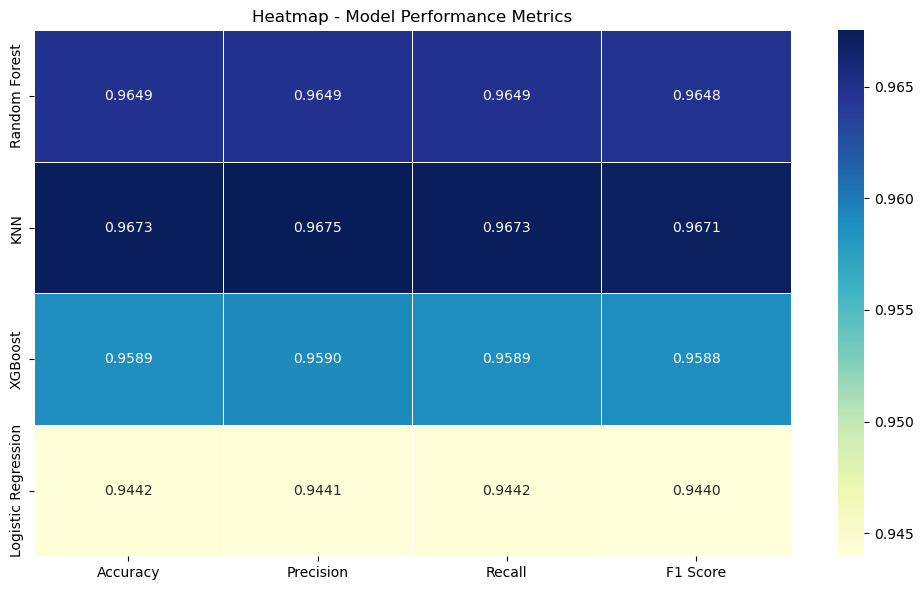

In [26]:
plt.figure(figsize=(10, 6))
sns.heatmap(metrics_df[["Accuracy", "Precision", "Recall", "F1 Score"]],
            annot=True, fmt=".4f", cmap="YlGnBu", linewidths=0.5)
plt.title("Heatmap - Model Performance Metrics")
plt.tight_layout()
plt.show()